# Detecting outliers in a dataset using Python

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

# Loading Dataset
df = pd.read_csv("../Datasets/airbnb.csv")
df.head()
# Checking missing values in price column to check outliers
# df['price'].isnull().sum()
df['price'].max()

10000

## Check Distribution of Data


<Axes: xlabel='price', ylabel='Count'>

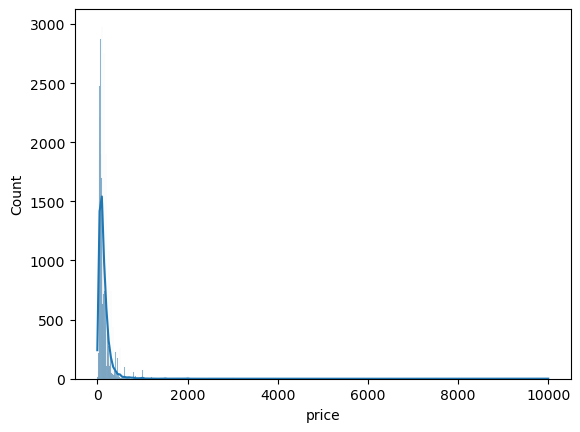

In [2]:
# sns.boxplot(df['price'])
sns.histplot(df['price'] , kde=True) 

In [3]:
df['price'].describe()
# Finding IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3-Q1
# Finding Upper and Lower Limits for Outliers
upper_limit = Q3 + (1.5*IQR)
lower_limit = Q1 - (1.5*IQR)
# Checking upper limit outliers
upper_outliers = df[df['price'] > upper_limit]
lower_outliers = df[df['price'] < lower_limit]
print(f"Outliers Beyond upper limit : {upper_outliers.shape} Outlier below lower bound : {lower_outliers.shape}")

Outliers Beyond upper limit : (2972, 16) Outlier below lower bound : (0, 16)


# Trimming Outliers
After Triming: outlier removed and boxplot is now making sense.

<Axes: ylabel='price'>

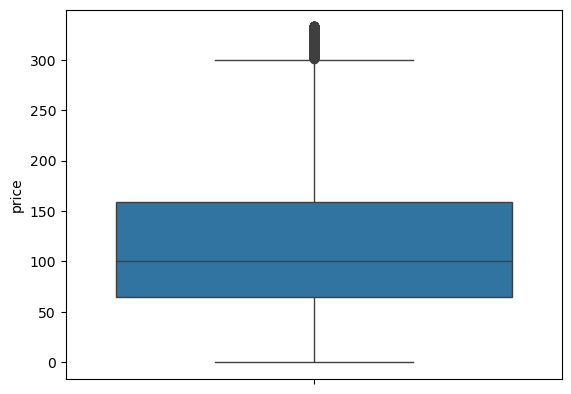

In [4]:
df_trimmed = df[(df['price'] < upper_limit) & (df['price'] > lower_limit)]
sns.boxplot(df_trimmed['price'])

## Replacing Outliers with Mean/Median and IQR Method

<Axes: ylabel='price'>

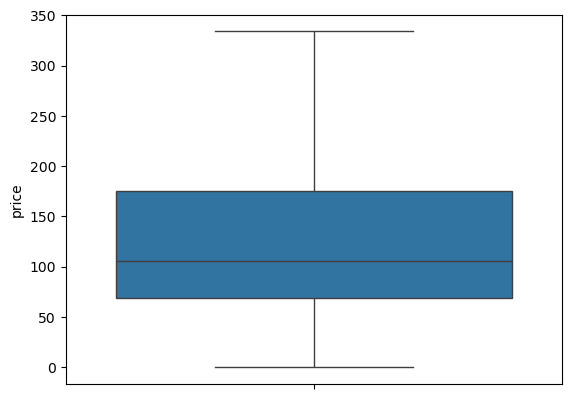

In [5]:
new_df = pd.read_csv("../Datasets/airbnb.csv")
dfs = new_df.copy()
dfs.describe()
Q1 = dfs['price'].quantile(0.25)
Q3 = dfs['price'].quantile(0.75)
IQR = Q3-Q1
upper_limit = Q3 + (1.5*IQR)
lower_limit = Q1 - (1.5*IQR)
med_val = dfs['price'].median()
dfs['price'] = dfs['price'].mask(dfs['price'] > upper_limit , upper_limit)
dfs['price'] = dfs['price'].mask(dfs['price'] < lower_limit , lower_limit)
sns.boxplot(dfs['price'])


## Removing Outliers with Winsorization Method

<Axes: ylabel='price'>

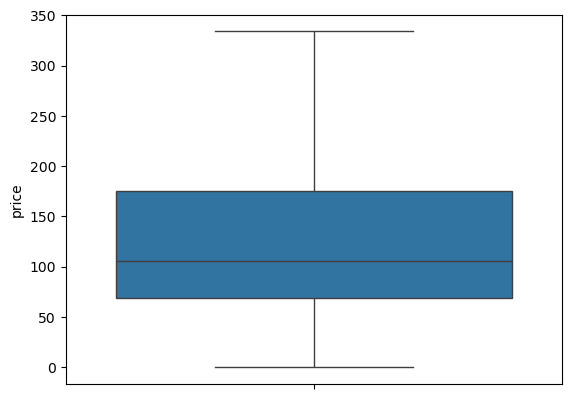

In [6]:
wdf = pd.read_csv("../Datasets/airbnb.csv")
# Calculating limits
Q1 = wdf['price'].quantile(0.25)
Q3 = wdf['price'].quantile(0.75)
IQR = Q3-Q1
upper_limit = Q3 + (1.5*IQR)
lower_limit = Q1 - (1.5*IQR)
wdf['price'] = wdf['price'].clip(lower_limit, upper_limit)
sns.boxplot(wdf['price'])
# sns.histplot(wdf['price'] , kde=True)